No count Data : 131


C:\Users\bob01\AppData\Local\Temp\ipykernel_4264\1224880577.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper left')


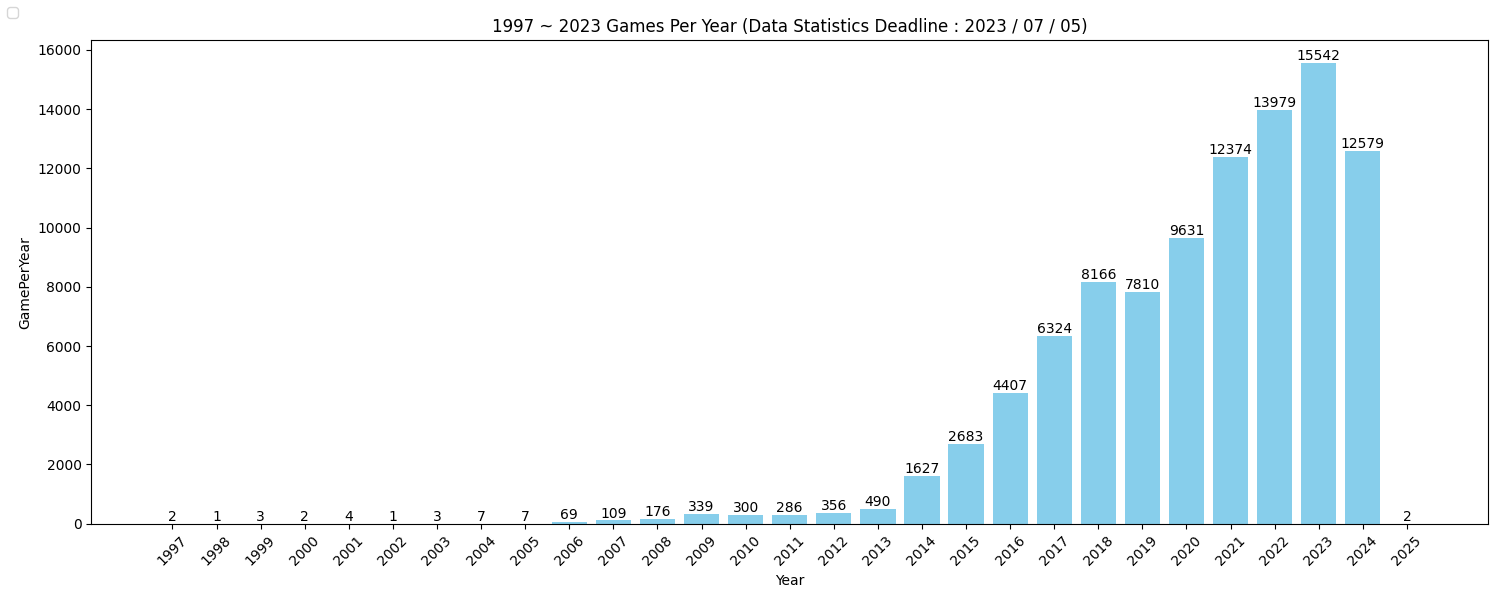

In [10]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# 從 JSON 檔案載入遊戲資料
def load_games_from_json(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return json.load(f)

free_games = load_games_from_json('free_games.json')
paid_games = load_games_from_json('paid_games.json')

# 將免費和付費遊戲資料合併
all_games = free_games + paid_games


# 計算每年遊戲的數量
def count_games_by_year(games):
    year_counts = {}
    delcount = 0
    for game in games:
        try:
            release_date = datetime.strptime(game['releaseDate'], '%b %d, %Y')
            year = release_date.year
            year_counts[year] = year_counts.get(year, 0) + 1
        except ValueError:
            delcount+=1
            # print(f"略過格式不正確的日期：{game['releaseDate']}")
    print(f'No count Data : {delcount}')
    return year_counts

year_counts = count_games_by_year(all_games)



# 繪製圖表
years = sorted(year_counts.keys())
game_counts = [year_counts[year] for year in years]

fig, ax1 = plt.subplots(figsize=(15, 6))

# 繪製直方圖
bars = ax1.bar(years, game_counts, color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('GamePerYear', color='black')
ax1.tick_params('y', labelcolor='black')

plt.title('1997 ~ 2023 Games Per Year (Data Statistics Deadline : 2023 / 07 / 05)')
plt.xticks(years, rotation=45)
fig.legend(loc='upper left')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()